In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.calibration import LabelEncoder

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
df.shape

(1599, 12)

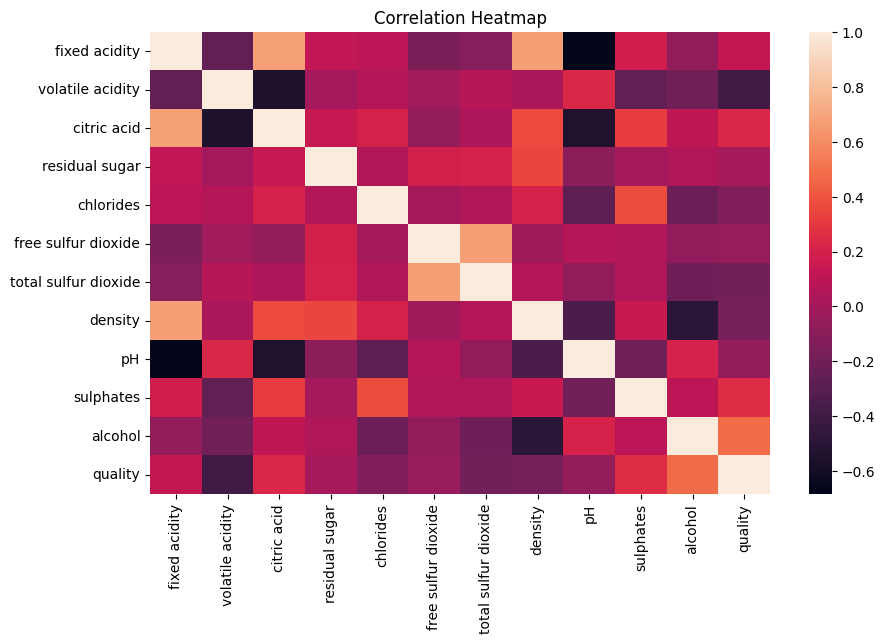

In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='fixed acidity', ylabel='density'>

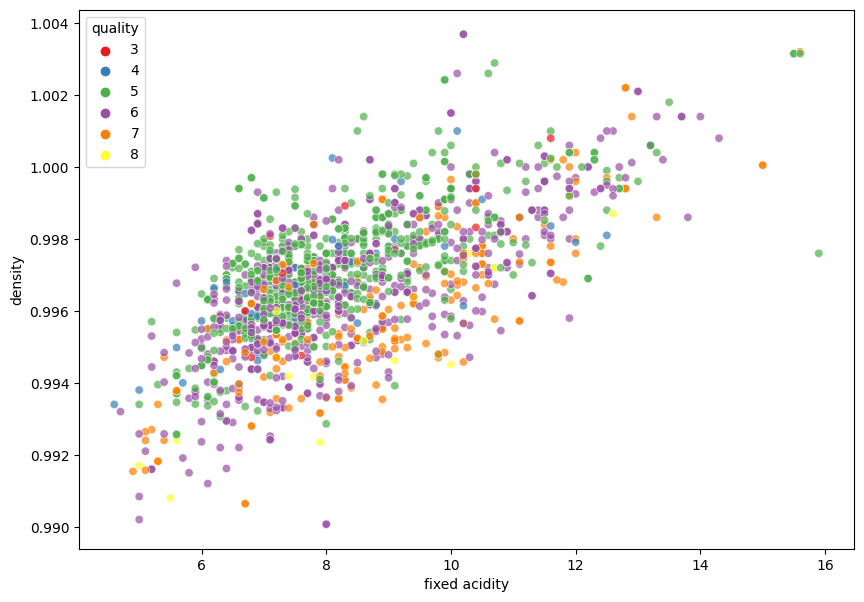

In [85]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "Set1")

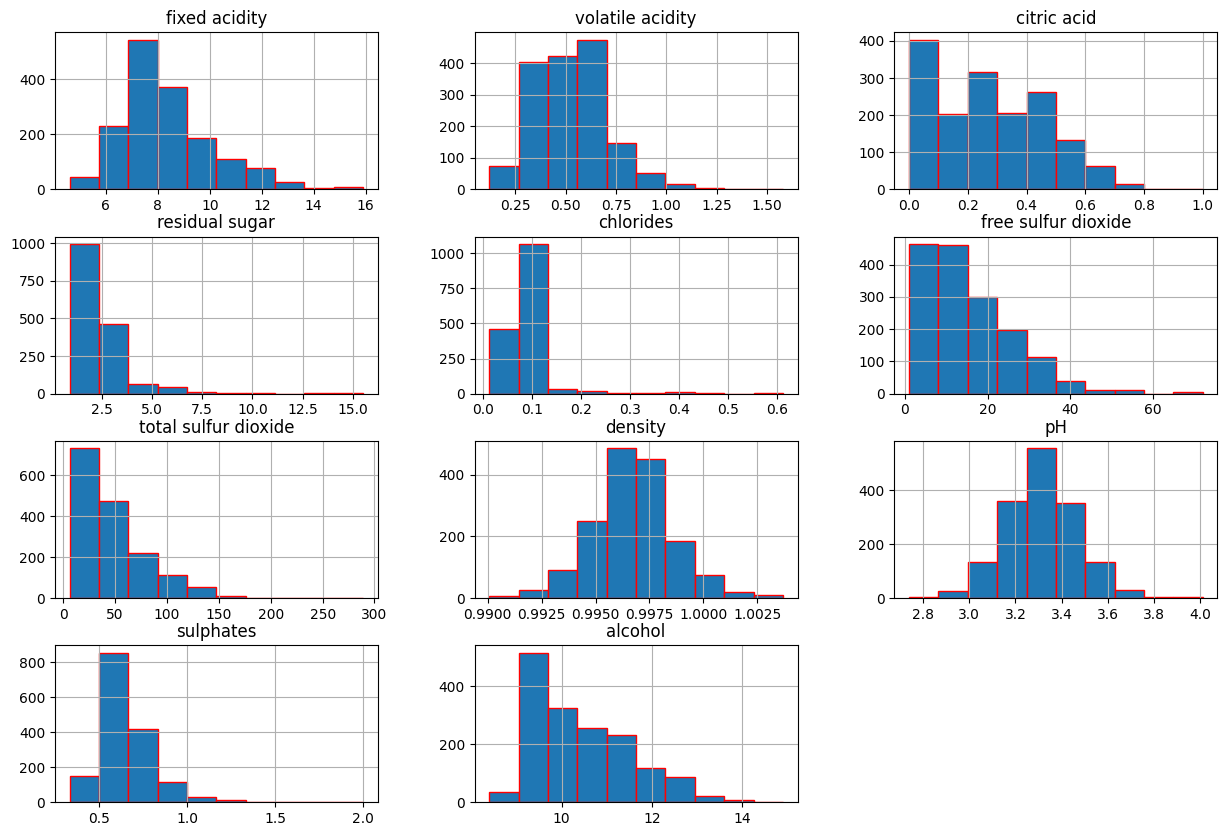

In [86]:
input_variables = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

# Create histograms for each input variable
df.hist(input_variables , edgecolor = 'red' ,figsize=(15,10))
# display histogram
plt.show()



In [87]:
#Seperating the dataset as response variable and feature variabes
X = df.drop ('quality',axis =1 )

In [88]:
le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [89]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [90]:
X.shape

(1599, 11)

In [91]:
y.shape

(1599, 1)

In [92]:
#Applying Standard scaling to get optimized result
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2)

In [94]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 11)
y_test_cat = tf.keras.utils.to_categorical(y_test, 11)

In [95]:
y_test_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
from tensorflow import keras
from tensorflow.keras import layers

ann = tf.keras.models.Sequential(layers = None , name = None)

ann.add(tf.keras.layers.Input(shape = 11,))
ann.add(tf.keras.layers.Dense(units = 256 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 256 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 11 , activation = "sigmoid"))
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3072      
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 11)                2827      
                                                                 
Total params: 71691 (280.04 KB)
Trainable params: 71691 (280.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
ann.compile(optimizer = 'adam' , loss = 'mse' ,metrics= ['accuracy'])

In [98]:
hist_1 = ann.fit(
    X_train, y_train_cat,
    batch_size = 128,
    epochs = 250,
    validation_data=(X_test, y_test_cat)
)

Epoch 1/250
10/10 [==============================] - 1s 22ms/step - loss: 0.2114 - accuracy: 0.3745 - val_loss: 0.1590 - val_accuracy: 0.4187
Epoch 2/250
10/10 [==============================] - 0s 8ms/step - loss: 0.1142 - accuracy: 0.4332 - val_loss: 0.0722 - val_accuracy: 0.4125
Epoch 3/250
10/10 [==============================] - 0s 8ms/step - loss: 0.0629 - accuracy: 0.4363 - val_loss: 0.0589 - val_accuracy: 0.4469
Epoch 4/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0577 - accuracy: 0.5285 - val_loss: 0.0576 - val_accuracy: 0.5219
Epoch 5/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0562 - accuracy: 0.5434 - val_loss: 0.0562 - val_accuracy: 0.5281
Epoch 6/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 0.5567 - val_loss: 0.0543 - val_accuracy: 0.5375
Epoch 7/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.5661 - val_loss: 0.0532 - val_accuracy: 0.5281
Epoch 8/250


In [99]:
accuracy = ann.evaluate(X_test, y_test_cat)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.6313
Test Accuracy: [0.04707046225667, 0.6312500238418579]


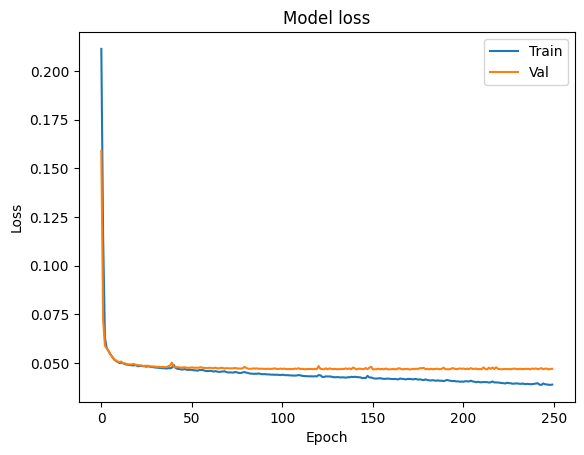

In [100]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

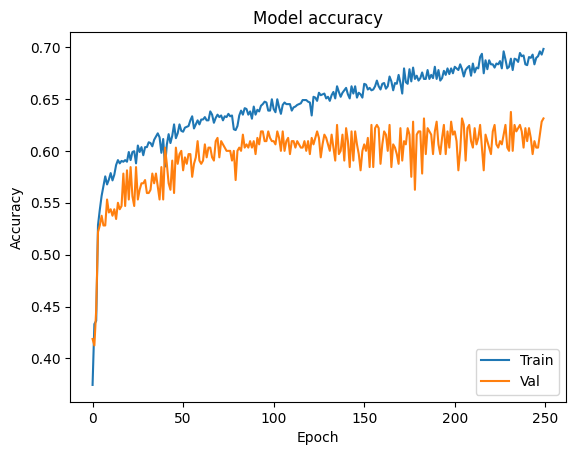

In [101]:
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()